# End of Term Project: Fingerprint Matching

**Multimedia Retrieval: Basic Concepts - Project**

Summer 2022, University of Konstanz

Lecturers: Prof. Dr. Daniel Keim / Maximilian Fischer / Lucas Joos / Alexander Frings (Data Analysis & Visualization Group)

Project members: <font color='red'>TODO: YOUR NAMES</font>

# Project Information

##  Aim

The purpose of this project is to give you some real hands-on experience with multimedia databases and related concepts, as discussed in the lecture. The basis for this project is fingerprint image data that should be processed and stored such that the data can be easily and rapidly queried. This relates to many real-world applications as, for instance, fingerprint-based unlocking of mobile devices, fingerprint evaluation for criminal investigations, or authentication to authorities.

## Dataset

With this project, you receive different images of fingerprints that are categorized as training data, test data, and validation data. The training data is to be used to create a database and to insert the important features/characteristics, allowing the later querying. The test data has to be used to check whether your approach is capable of successfully querying your database for similar fingerprints. Both datasets are labeled. The validation data should give you an impression of how we will test your approach. We will add similar data as currently contained in the validation directory and use the data to check whether your system can be used to successfully query the given data. Please keep in mind that only the training data should be used for creating your database. However, your methods for preprocessng, feature extraction, and so on also need to be included in the querying process.

## Goals

At the completion of the project, your code should:

- [ ] show at least 3 further sensible statistics for the data. **(2P)**
- [ ] preprocess the data in a meaningful way such that your following approaches can work with unified data of sufficient quality. **(6P)**
- [ ] generate a database capable of storing all relevant features of fingerprint data. **(5P)**
- [ ] extract the main features of the fingerprint data. **(12P)**
- [ ] populate the database with the training data features. **(5P)**
- [ ] query the database with the test data. Please note your query image also has to be preprocessed and the features have to be extracted before querying/comparing the features. **(5P)**
- [ ] use the validation data set to check your approach quality (similarly as for the test data, but we will use this to test your approach with further data). **(1P)**


Please keep in mind that your code has to be accompanied by meaningful and complete explanations.

The querying pipeline including the test image processing (top) and the comparison with the database features (bottom) can be seen in the image below:

![pipelines](./figures/pipelines.png)

*Source:* Fons, Mariano, Francisco Fons, and Enrique Canto. "Design of an embedded fingerprint matcher system." 2006 IEEE International Symposium on Consumer Electronics. IEEE, 2006.

## Requirements and Don'ts

- <font color='orange'>You have to achieve at least 18 of 36 points to pass this project and passing the project is mandatory for the exam admission. In serious cases, this might have further consequences from the examination office.</font>
- <font color='orange'>Do NOT plagiarize from your colleagues or external sources. Plagiarism will lead to 0 points for the projects and will thus exclude you from the exam admission.</font>
- <font color='orange'>Your notebook MUST be runnable by us in sequence (i.e. we will run it with Kernel -> Restart & Run All). Please test this, otherwise we may not be able to grade your project, resulting in a failing grade!</font>
- <font color='orange'>Your notebook has to be self-contained, but may include (1) included python scripts (helper scripts) in the same directory and (2) images as part of your explanations.</font>
- <font color='orange'>Explain your approaches! What do you want to achieve, why did you decide for this approach, ...</font>
- <font color='orange'>All required dependencies must be listed in a requirements.txt with pinned versions</font>
- <font color='orange'>**You are not allowed to use libraries solving the __entire__ (or large parts) of the tasks for you.** The purpose of the project is that you understand and implement the relevant concepts for the required steps on your own. This means that you are allowed to use supporting libraries like matplotlib, pandas, numpy, sqlite3, image processing libraries and so on, but they may only support you with implementing the individual steps without completely solving them for you. If you are unsure, whether certain libraries or approaches are ok, feel free to write us an e-mail.</font>
- <font color='orange'>In case of important questions, you can contact us via e-mail _early_. However, we will not reveal any solutions, debug your code, or reply to any last-minute questions.</font>

## Submission Format

- [ ] Submit your (1) jupyter notebook *.ipynb, (2) any support *.py, (3) any images under `figures/`...
- [ ] ...together with a minimal `requirements.txt` for python 3.10 with pinned dependencies...
- [ ] ...as a **SINGLE zip file**
- [ ] Do NOT include the data directory (and do _not_ modify the loading logic)
- [ ] Check that your code runs with `Restart & Run All`

# Code

## Setup

In [1]:
# basic requirements (requires Python 3.10+)
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
# own requirements
# ...add your own here...

<font color='blue'>Explanations:</font> TODO

## Loading

Here you load the test, train, and evaluation datasets

### Read data

In [3]:
# loading data (do _not_ modify paths!)
x_train = list(Path('./data/train/').glob('*.BMP'))
x_test = list(Path('./data/test/').glob('*.BMP'))
x_val = list(Path('./data/validation/').glob('*.BMP'))

# TODO: ...load data...

### Data Statistics

In [45]:
print('### Data ###')
print('# train:', len(x_train))
print('# test:', len(x_test))
print('# val:', len(x_val))
print('')

print('Example Image:')



### Data ###
# train: 200
# test: 40
# val: 3

Example Image:
size  (241, 298)
[(16499, (255, 255, 255)), (1806, (253, 253, 253)), (1269, (251, 251, 251)), (651, (249, 249, 249)), (566, (247, 247, 247)), (424, (245, 245, 245)), (388, (243, 243, 243)), (309, (241, 241, 241)), (305, (239, 239, 239)), (240, (237, 237, 237)), (226, (235, 235, 235)), (222, (233, 233, 233)), (211, (231, 231, 231)), (180, (229, 229, 229)), (188, (227, 227, 227)), (176, (225, 225, 225)), (202, (223, 223, 223)), (188, (221, 221, 221)), (201, (219, 219, 219)), (183, (217, 217, 217)), (171, (215, 215, 215)), (168, (213, 213, 213)), (182, (211, 211, 211)), (180, (209, 209, 209)), (182, (207, 207, 207)), (166, (205, 205, 205)), (178, (203, 203, 203)), (133, (201, 201, 201)), (152, (199, 199, 199)), (162, (197, 197, 197)), (165, (195, 195, 195)), (131, (193, 193, 193)), (145, (191, 191, 191)), (143, (189, 189, 189)), (134, (187, 187, 187)), (116, (185, 185, 185)), (121, (183, 183, 183)), (139, (181, 181, 181)), (107

In [5]:
sum_x = 0;
sum_y = 0;

for i in range(0, len(x_train)):
    fp1 = Image.open(x_train[i])
    ## Size of the images
    print("size ", fp1.size)
    # display(Image.open(x_train[i]))
    sum_x += fp1.size[0]
    sum_y += fp1.size[1]


    ## get the colors from the image 
    colors = fp1.getcolors()
    print(colors)

## average size
average_size_x = sum_x / len(x_train)
average_size_y = sum_y / len(x_train)

print("average_size_x", average_size_x)
print("average_size_y", average_size_y)

<font color='blue'>Explanations:</font> TODO

## Preprocessing

Here you perform preprocessing on your data. You have to clean it, select appropriate images, maybe perform augmentation, do enhancements, etc.

### Analyze and preprocess

In [6]:
# TODO: ...perform preprocessing, just as cleaning, image augmentation, grayscale adaption, etc...

### Data Statistics

In [7]:
# TODO: ...display several stats here from your preprocessing...

<font color='blue'>Explanations:</font> TODO

## Database Infrastructure

Here you setup your multimedia database

In [8]:
# TODO: ...specify database, helper functions, storage and retrieval...

<font color='blue'>Explanations:</font> TODO

## Feature Extraction

Here you define your feature extraction methods.

In [9]:
# TODO: ...feature extraction...

<font color='blue'>Explanations:</font> TODO

## Database Population

Here you fill your database with your **training** images / extracted features. Please also include the information provided by the file names. If querying your database leads to a match, you should be able to give the person id and the finger name (e.g. person 1, left thumb).

In [10]:
# TODO: ...fill the database...

<font color='blue'>Explanations:</font> TODO

## Retrieval and Querying

Here, you use the **test** images as query for the database, returing matching results and accuracy. The query process involves the definition of a good feature comparison method.

In [11]:
# TODO: ... quering...
# TODO: ...feature comparison...
# TODO: ...result preparation...

### Result display

The results for a given query image should be:

- the source image and a visual indication of the used features
- the 5 best matching fingerprints
   - name
   - confidence score
   - matching / non-matching features as color-indicated insets
- the time for the query

In [12]:
def display_images(img_path_1, img_path_2, features):
    """example display function"""
    with Image.open(img_path_1) as im:
        with Image.open(img_path_2) as im2:
            # scale up for viewing
            scale = 3
            im, im2 = [i.resize(( int(i.width * scale), int(i.height * scale))) for i in [im, im2]]
            # combined image
            out = Image.new("RGB", (2*im.width, im.height), (255, 255, 255))
            out.paste(im, (0, 0))
            out.paste(im2, (im.width, 0))
            
            # labels
            d = ImageDraw.Draw(out)
            d.text((0, im.height - 12), str(img_path_1), fill=(0,255,0))
            d.text((im.width, im.height - 12), str(img_path_2), fill=(0,255,0))
            
            # feature display
            circle_size = int(im.width/30)
            for x in features:
                x = [int(i*s/100.0) for i,s in zip(x, [im.width, im.height, im2.width, im2.height])]
                print(x, im.width, im.height)
                d.ellipse(xy=(x[0], x[1], x[0]+circle_size, x[1]+circle_size), outline="red", width=2)
                d.ellipse(xy=(im.width+x[2], x[3], im.width+x[2]+circle_size, x[3]+circle_size), outline="red", width=2)
            display(out)

[144, 92, 115, 247] 288 309


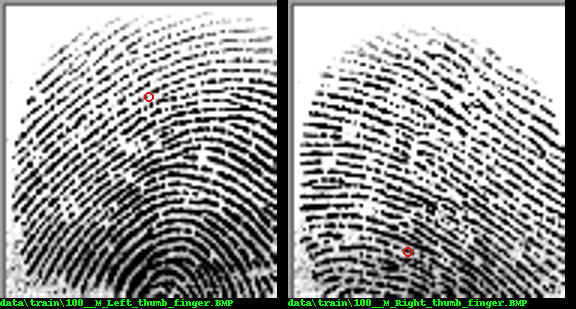

In [13]:
# example display function to show corresponding matches between two images
# feel free to extend this
display_images(x_train[0], x_train[1], [[50, 30, 40, 80]])

In [14]:
# TODO: ...display results...

<font color='blue'>Explanations:</font> TODO

# Validation

Here, use the validation dataset and compute apropriate scores.

<font color='red'>Note: The given validation dataset is just for your convenience to test the working of your code! For the actual evaluation, we will use a different, larger dataset which is not available to you.</font>

In [15]:
# print(x_val)
# query all images in x_val

# print stats

# Overall score (f1)!